In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

import gensim.downloader as api

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense

In [13]:
df = pd.read_csv('/content/cleaned_reviews.csv')
df.head()

,Unnamed: 0,Review,Rating,cleaned_reviews
0,0,nice hotel expensive parking got good deal sta...,4,nice hotel expens park got good deal stay hote...
1,1,ok nothing special charge diamond member hilto...,2,ok noth special charg diamond member hilton de...
2,2,nice rooms not 4* experience hotel monaco seat...,3,nice room not experi hotel monaco seattl good ...
3,3,"unique, great stay, wonderful time hotel monac...",5,uniqu great stay wonder time hotel monaco loca...
4,4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...


In [14]:
X = df['cleaned_reviews'].astype(str)
y = df['Rating']

y = y - 1

### **Pre-Process Reviews**

In [15]:
glove_model = api.load('glove-wiki-gigaword-100')

# Tokenize and pad
tokenizer = Tokenizer(num_words = 10000, oov_token = '<OOV>')
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
padded_sequences = pad_sequences(sequences, maxlen = 300, padding = 'post')

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)

In [16]:
embedding_dim = 100
word_index = tokenizer.word_index
num_words = min(10000, len(word_index) + 1)

embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    if i < num_words:
        if word in glove_model:
            embedding_matrix[i] = glove_model[word]

### **LSTM Model**

In [21]:
model = Sequential([
    Embedding(input_dim = num_words, output_dim = embedding_dim, weights = [embedding_matrix],
              input_length = 300, trainable = False),
    LSTM(256, return_sequences = False),
    Dropout(0.3),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(5, activation = 'softmax')
])

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4),
              metrics = ['accuracy'])

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ ?                           │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

In [22]:
history = model.fit(X_train, y_train,
                    validation_split = 0.2,
                    epochs = 20,
                    batch_size = 256)

Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - accuracy: 0.4128 - loss: 1.5923 - val_accuracy: 0.4514 - val_loss: 1.4067
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.4385 - loss: 1.3890 - val_accuracy: 0.4568 - val_loss: 1.3456
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.4435 - loss: 1.3607 - val_accuracy: 0.4553 - val_loss: 1.3394
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.4448 - loss: 1.3466 - val_accuracy: 0.4517 - val_loss: 1.3563
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.4391 - loss: 1.3671 - val_accuracy: 0.4511 - val_loss: 1.3525
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.4337 - loss: 1.3761 - val_accuracy: 0.4520 - val_loss: 1.3512
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.4408 - loss: 1.3625 - val_accuracy: 0.4526 - val_loss: 1.3540
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.4425 - loss: 1.3634 - val_accuracy: 0.4529 - v

In [26]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")


y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis = 1)

precision = precision_score(y_test, y_pred_class, average='weighted')
recall = recall_score(y_test, y_pred_class, average='weighted')

print(f"\nTest Precision: {precision:.4f}")
print(f"\nTest Recall: {recall:.4f}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4473 - loss: 1.3369

Test Accuracy: 0.4367
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

Test Precision: 0.2853

Test Recall: 0.4367


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


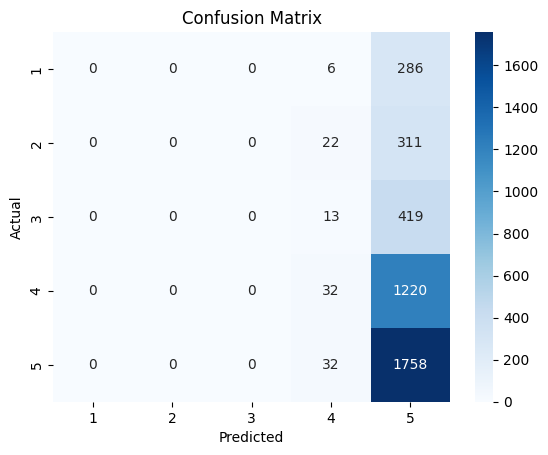

In [28]:
cm = confusion_matrix(y_test, y_pred_class)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()